In [38]:
import pandas as pd

titanic_df = pd.read_csv('/Users/t2024-m0188/Desktop/ML/titanic/train.csv')
titanic_df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [39]:
#가설: 비상상황특성상 여성을 배려해서 많이 생존
#Privot Table 만들어 확인
#그래프 통해서 확인
#aggfunc = size: 갯수를 다 세줌

#피벗테이블 만들기

pd.pivot_table(titanic_df, index = 'Sex', columns = 'Survived', aggfunc = 'size')

Survived    0    1
Sex               
female     81  233
male      468  109

In [40]:
# 정확도: 맞춘개수/전체 데이터
# 생존을 맞춤
# 여성은 다 살았고, 남성은 다 죽었다

len(titanic_df)

891

In [41]:
# 정확도: 맞춘개수/전체 데이터
# 78%

(468)/891*100

52.52525252525253

<Axes: xlabel='Sex', ylabel='count'>

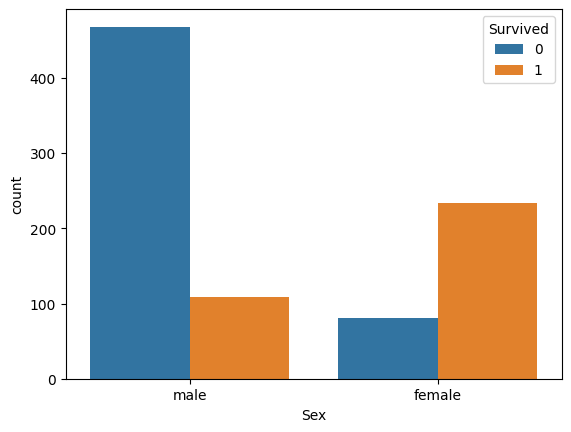

In [42]:
# 피벗테이블 시각화하기
#hue: 버례

import seaborn as sns
sns.countplot(titanic_df, x = 'Sex', hue = 'Survived')

In [43]:
#############로지스틱회궤 실습

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
#titancic에서 사용 용이한 데이터들
#숫자: age, sibsp, parch, fare
#범주: pclass, sex, cabin, embarked
#x변수 1개, y변수 survived


titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [46]:
#info: 데이터의 전체갯수와 결측치
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
#X변수 fair, y변수 survivied
#[[]]해야 에러 안 남
x_1 = titanic_df[['Fare']]
y_true = titanic_df[['Survived']]

In [48]:
model_lor = LogisticRegression()
model_lor.fit(x_1, y_true)

/Users/t2024-m0188/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
#이상적인 로스틱회귀 그림이 되는지는 산점도를 보면 됨

<Axes: xlabel='Fare', ylabel='Survived'>

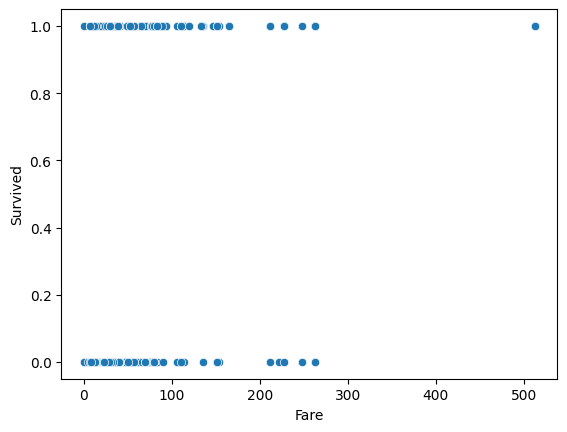

In [50]:
#산점도
#기대한것은 아래는 젤 왼쪽에 몰려있는거, 위는 젤 오른쪽에 몰려있는것
sns.scatterplot(titanic_df, x = 'Fare', y='Survived')

<Axes: xlabel='Fare', ylabel='Count'>

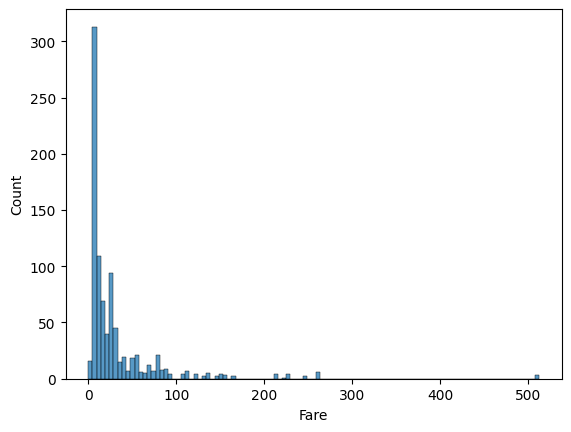

In [51]:
#histogram: 데이터에 대한 분포 알기
#데이터 훈련하기 전에 보기
#y축이 데이터의 갯수여서 안 쓴거

sns.histplot(titanic_df, x='Fare')

In [52]:
#데이터 기술통계 보는 법(수치형): describe
#Fare만 보려고 함
titanic_df.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [53]:
#모델 보려고 함
model_lor = LogisticRegression()
model_lor.fit(x_1, y_true)

/Users/t2024-m0188/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [54]:
#데이터 학습하기(함수 만들기)

def get_att(x): 
    print("클래스 종류", x.classes_)
    print("독립변수 갯수", x.n_features_in_)
    print("들어간 독립변수(x)의 이름", x.feature_names_in_) 
    print("가중치", x.coef_)
    print("바이어스", x.intercept_)

In [55]:
get_att(model_lor)

클래스 종류 [0 1]
독립변수 갯수 1
들어간 독립변수(x)의 이름 ['Fare']
가중치 [[0.01519617]]
바이어스 [-0.94129222]


In [56]:
from sklearn.metrics import accuracy_score, f1_score
def get_metrics(true, pred):
    print("정확도", accuracy_score(true, pred))
    print("f1 score", f1_score(true, pred)) 

In [57]:
#예측하기

model_lor.predict(x_1)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [58]:
y_pred_1 = model_lor.predict(x_1)


In [59]:
get_metrics(y_true,y_pred_1)

정확도 0.6655443322109988
f1 score 0.354978354978355


#간단한(위에는) 로지스틱 회궤학습


In [ ]:
#이제부터 다중 로지스틱 회궤
#x변수 여러개 넣는것 빼고는 차이가 별로 없음

#null 값이 없어야 함


In [71]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  sex_en       891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
#y: survived
#x: pclass, sex, fare, embarked

#수치: fare
#범주: pclass, sex

In [ ]:
def get_sex(x):
    if x == 'female':
        return 0
    else:
        return 1
    
titanic_df['sex_en'] = titanic_df['Sex'].apply(get_sex)

#titanic_df에 sex_en 컬럼 만들려고 함
#female =0 male=1 이렇게 나타낸걸 적용시키기 위해 apply 씀
#'titanic_df['Sex'].apply(get_sex)' 이걸 간단히 얘기하자면 titanic_df['sex']에서 get_sex를 계산한걸 보여주라는 뜻

In [75]:
titanic_df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  sex_en  
0      0         A/5 21171   7.2500   NaN        S       1  
1      0          PC 17599  71.2833   C85        C       0  
2      0  STON/O2. 3101282   7.9250   NaN        S       0

In [76]:
x_2  = titanic_df[['Pclass', 'sex_en', 'Fare']]
y_true = titanic_df[['Survived']]
model_lor_2 = LogisticRegression()
model_lor_2.fit(x_2,y_true)

/Users/t2024-m0188/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [66]:
get_att(model_lor_2)

클래스 종류 [0 1]
독립변수 갯수 3
들어간 독립변수(x)의 이름 ['Pclass' 'sex_en' 'Fare']
가중치 [[-8.88331324e-01 -2.53993425e+00  1.64019087e-03]]
바이어스 [3.02004403]


In [77]:
#예측한 결과값 확인하기

y_pred_2 = model_lor_2.predict(x_2)
y_pred_2[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
#x변수가 fare
get_metrics(y_true,y_pred_1)

#x변수가 fare, pclass, sex
get_metrics(y_true,y_pred_2)

정확도 0.6655443322109988
f1 score 0.354978354978355
정확도 0.7867564534231201
f1 score 0.7121212121212122


In [69]:
#각 데이터별 y=1일떄 확률 뽑아내기
model_lor_2.predict_proba(x_2)

array([[0.8977979 , 0.1022021 ],
       [0.09546762, 0.90453238],
       [0.40901264, 0.59098736],
       ...,
       [0.40287202, 0.59712798],
       [0.58880217, 0.41119783],
       [0.89772263, 0.10227737]])